In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings


In [15]:
data_smev = pd.read_excel("/content/smev_data.xlsx", sheet_name=None)
data_smev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [16]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


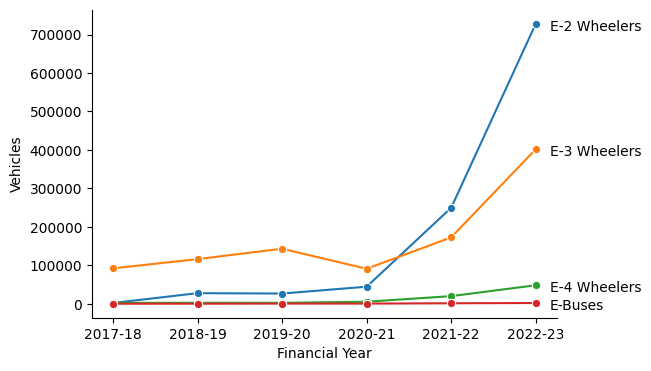

In [17]:
# UNDERSTAND SALES DIFFERENCE OVER THE YEARS FOR EACH VEHICLE TYPE


import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the line plot
sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10', ax=ax)

# Set labels and legend
ax.set_xlabel("Financial Year")
ax.set_ylabel("Vehicles")
ax.legend(title='Category')

# Annotate the last data point
for col in data_smev['EV Industries']['category'].unique():
    last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
    ax.annotate(f"{last_point['category']}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Hide legend
ax.get_legend().remove()

# Show plot
plt.show()

From the graph, we can see a significant growth trajectory of India's **two-wheeler market** in 2023, being the leader in the industry.

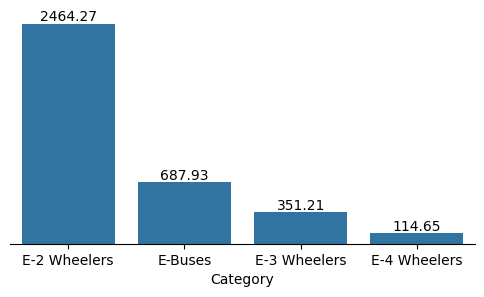

In [18]:
# ANALYZE REVENUE OF INDUSTRY

import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Amount INR Cr'
data_smev['EV Market'] = data_smev['EV Market'].sort_values('Amount INR Cr', ascending=False)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 3))

# Plot the bar chart
sns.barplot(data=data_smev['EV Market'], x='Category', y='Amount INR Cr', ax=ax)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container)

# Remove y-axis ticks and label
plt.yticks([])
plt.ylabel("")

# Hide spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Show plot
plt.show()

**two-wheelers** are the major revenue generators

In [19]:
# Select the first 4 keys from data_smev
ev2w = list(data_smev.keys())[0:4]

# Concatenate the selected columns into a single DataFrame
data_ev2w = pd.concat([data_smev[key] for key in ev2w])

# Convert 'maker' column values to uppercase
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [20]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [21]:
import numpy as np

# Perform replacements in the 'maker' column
data_ev2w['maker'] = data_ev2w['maker'].replace({
    'AMPERE VEHICLES': 'AMPERE',
    'ATHER ENERGY': 'ATHER',
    'BEING INDIA': 'BENLING',
    'JITENDRA NEW EV': 'JITENDRA',
    'OKINAWA AUTOTECH': 'OKINAWA'
})

# Sort unique values in 'maker' column
sorted_makers = np.sort(data_ev2w['maker'].unique())

In [22]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


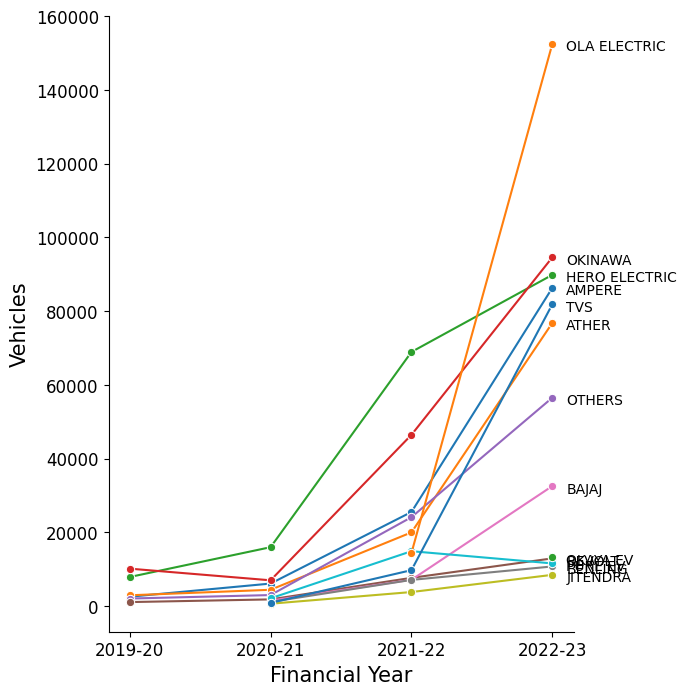

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by financial year and maker, summing up the number of vehicles
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 8))

# Plot the line plot
sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10', ax=ax)

# Set labels, ticks, and legend
ax.set_xlabel("Financial Year", fontsize=15)
ax.set_ylabel("Vehicles", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(title='Maker')

# Annotate the last data point
for maker in data_ev2w_year['maker'].unique():
    last_point = data_ev2w_year[data_ev2w_year['maker'] == maker].iloc[-1]
    ax.annotate(f"{maker}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')

# Remove top and right spines
ax.spines[['right', 'top']].set_visible(False)

# Hide legend
ax.get_legend().remove()

# Show plot
plt.show()

**OLA Electric** has emerged as the market leader, concentrating on **two-wheeler** manufacturing.

**EV MARKET SEGMENTATION- behavioral and psychographic insights**

In [24]:
data_bw = pd.read_csv("/content/ev2_bikewale.csv")
data_model = pd.read_csv("/content/ev_model_spec.csv")

In [25]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [26]:
# MISSING VALUES

# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() * 100 / data.shape[0])

# Sort the result in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Print or further process missing_percentage_sorted as needed
print(missing_percentage_sorted)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          


*   analyze sentiment of each review and provide scores
*   apply PCA to the dataset
then, a scree plot is generated by plotting the within-cluster sum of squares (WCSS) against the number of clusters in KMeans clustering.





In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Initialize an empty list to store sentiment labels
sentiments_list = []

# Loop through each review text
for review_text in data['review']:
    # Check if the review text is NaN
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue

    # Calculate sentiment scores for the review text
    sentiment_scores = sentiments.polarity_scores(review_text)

    # Determine sentiment label based on positive and negative scores
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    # Append sentiment label to the list
    sentiments_list.append(sentiment_label)

# Add a new column 'sentiment' to the DataFrame
data['sentiment'] = sentiments_list

# Count the occurrences of each sentiment label
sentiment_counts = data['sentiment'].value_counts()

# Print the counts of each sentiment label
print(sentiment_counts)

sentiment
positive    527
negative    264
neutral      53
Name: count, dtype: int64


In [30]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [31]:
data_segment = data.iloc[:, 5:13].copy()
data_segment = data_segment.fillna(0.)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [32]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [33]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [34]:
# Transform the scaled data using PCA
data_pca = pca.transform(data_scaled)

# Create a DataFrame with the transformed principal components
df_pca = pd.DataFrame(data_pca, columns=[f'PC{x + 1}' for x in range(data_pca.shape[1])])

# Display the first few rows of the DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.291227 -1.038055  0.354864 -0.623469 -1.102720 -0.169287 -0.438012   
1  0.710801 -1.394405 -0.360466 -0.621671  0.320899 -0.086053 -0.426279   
2 -0.849149 -1.189765  0.167683 -0.410898 -0.409054 -0.191904 -0.329993   
3  1.967022 -0.878935 -0.100197  0.330003 -0.075822  0.069599  0.013068   
4  0.078940 -1.017161 -0.079210 -0.324132 -0.961554  0.005517 -0.107260   

        PC8  
0  0.957827  
1 -0.149917  
2  0.830738  
3  0.011328  
4  0.427972  


In [35]:
import pandas as pd

# Create factor loadings DataFrame
factor_loadings = pd.DataFrame(pca.components_, columns=df_pca.columns, index=data_segment.columns).T

# Apply background gradient with a different colormap
factor_loadings_styled = factor_loadings.style.background_gradient(cmap='viridis')

# Display the styled DataFrame
factor_loadings_styled

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
PC1,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
PC2,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
PC3,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
PC4,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
PC5,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
PC6,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
PC7,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
PC8,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

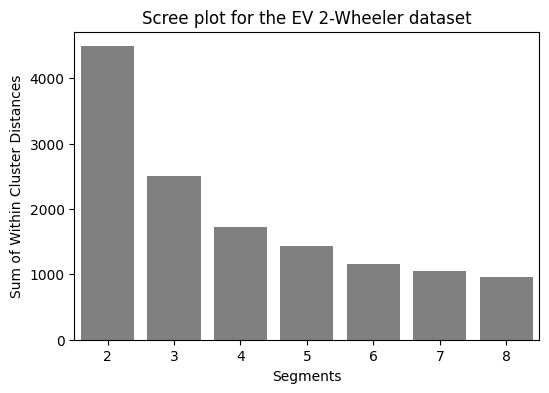

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fit KMeans models for different numbers of clusters
data_km28 = [KMeans(n_clusters=k, random_state=42).fit(data_scaled) for k in range(2, 9)]

# Calculate within-cluster sum of squares (WCSS) for each model
wcss = [model.inertia_ for model in data_km28]

# Create a bar plot of the WCSS values
plt.figure(figsize=(6, 4))
sns.barplot(x=range(2, 9), y=wcss, color='grey')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler dataset")
plt.show()


<ipython-input-37-3913b11d0a67>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcss_diff['WCSS Difference'].iloc[0] = 0


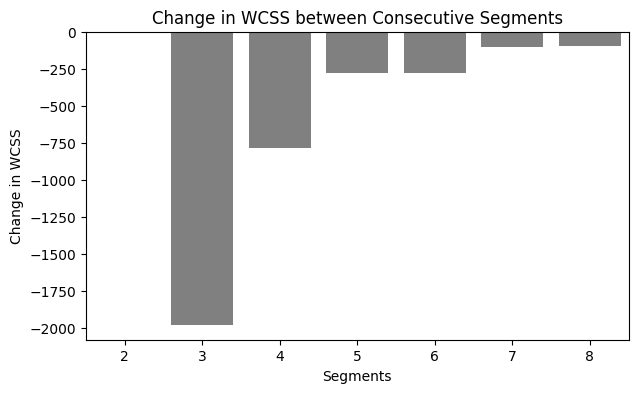

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the difference in WCSS between consecutive numbers of segments
wcss_diff = pd.DataFrame({'Segments': range(2, 9),
                          'WCSS Difference': pd.Series(wcss).diff()})

# Replace the first NaN value with 0
wcss_diff['WCSS Difference'].iloc[0] = 0

# Create a bar plot to visualize the WCSS difference
plt.figure(figsize=(7, 4))
sns.barplot(data=wcss_diff, x='Segments', y='WCSS Difference', color='grey')
plt.xlabel("Segments")
plt.ylabel('Change in WCSS')
plt.title("Change in WCSS between Consecutive Segments")
plt.show()

In [38]:
kmeans = data_km28[2]
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

optimal number of segments=4, as significant reduction in distance decreasing at that point.

PROFILING SEGMENTS

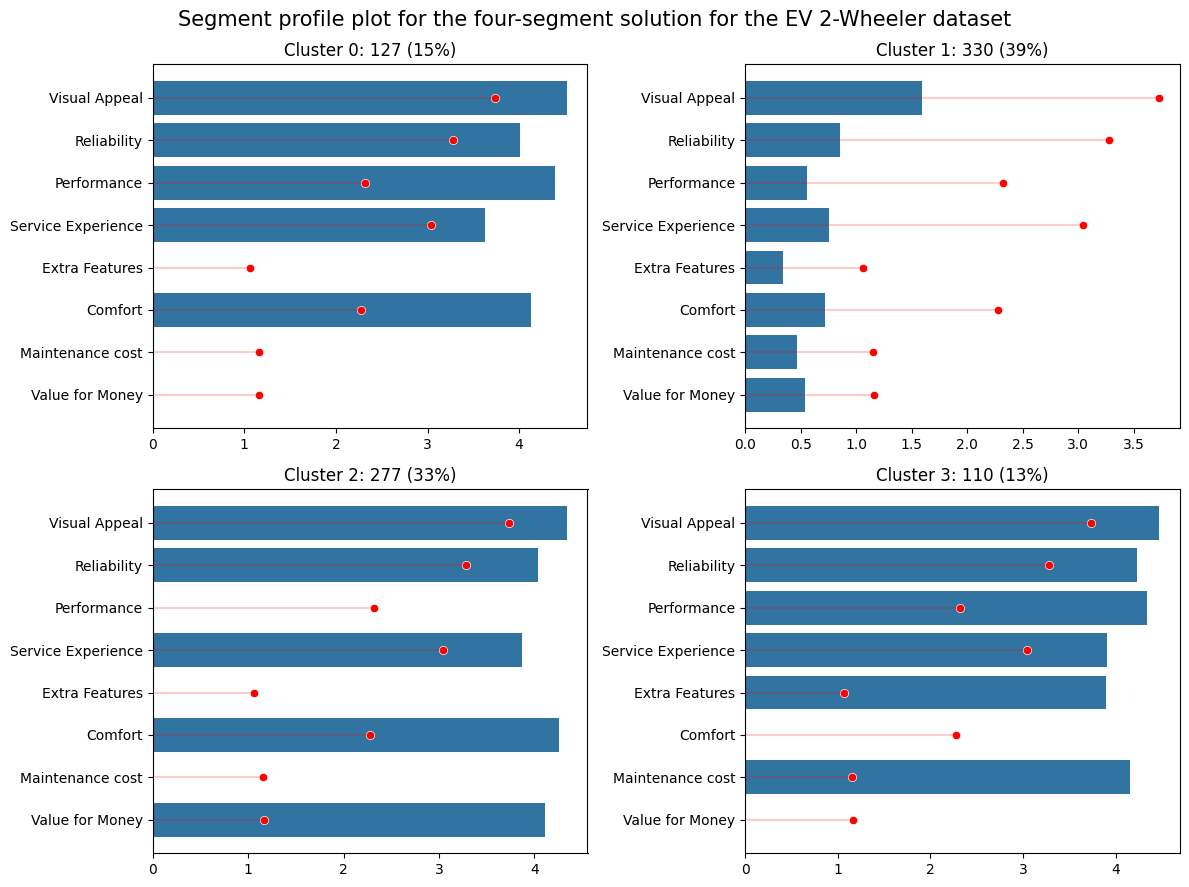

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster labels to the data
data_segment['cluster'] = kmeans.labels_

# Group by cluster and calculate the mean of each variable
data_pivot = data_segment.groupby('cluster').mean().T

# Calculate the overall mean for comparison
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

# Create subplots for each cluster
plt.figure(figsize=(12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=data_pivot, x=i, y=data_pivot.index)
    sns.scatterplot(data=data_pivot_mean, x='Value', y='Variable', color='red')
    for _, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha=0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_segment['cluster'].value_counts()[i]} "
              f"({data_segment['cluster'].value_counts()[i]*100/len(data_segment):.0f}%)")

# Add title and adjust layout
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler dataset", fontsize=15)
plt.tight_layout()
plt.show()

Segment 0 (15% of consumers) highly values visual appeal, reliability, performance, service experience, and comfort.

Segment 1 (39% of consumers) shows overall dissatisfaction.

Segment 2 (33% of consumers) appreciates visual appeal, reliability, service experience, and notably, perceives strong value for money.

Segment 3 (13% of consumers) prioritizes visual appeal, reliability, performance, service experience, extra features, and maintenance cost, showcasing distinct perceptions, particularly on features and costs.





KeyError: 'PC1'

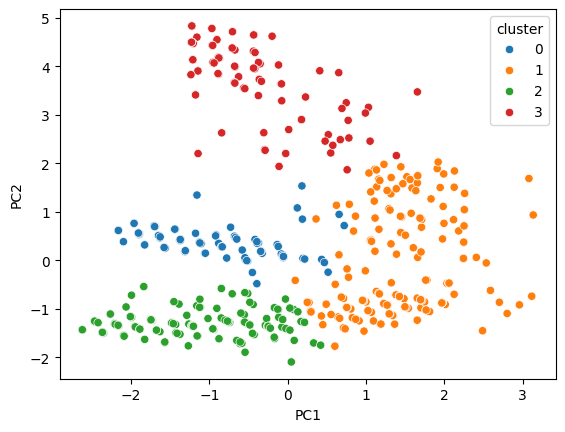

In [40]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()


DESCRIBING SEGMENTS


In [41]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

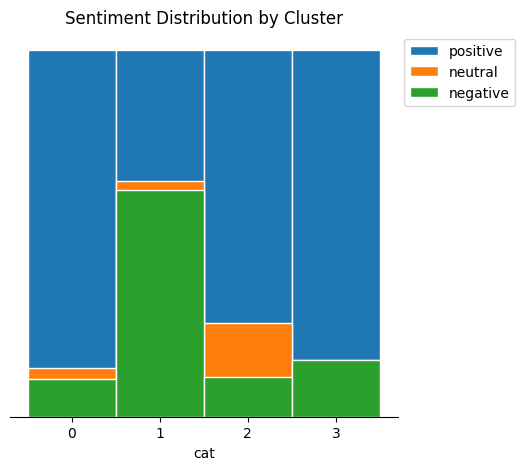

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the color list
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

# Define your sentiment_cluster DataFrame (assuming you have it)
sentiment_cluster = pd.crosstab(index=data_desc['cluster'], columns=data_desc['sentiment'])

# Define your mosaicplot function
def mosaicplot(df, color_list, figsize=(5, 5), barwidth=1, title="Simple Mosaic Plot", xlabel='cat'):
    fig, ax = plt.subplots(figsize=figsize)

    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis=0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)

    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
    x = [str(n) for n in ratio_cum_df.index.tolist()]

    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)

    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

    # Configure title and axis
    plt.title(title)
    plt.xlabel(xlabel)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()

# Call your mosaicplot function with sentiment_cluster DataFrame
mosaicplot(sentiment_cluster, color_list, title='Sentiment Distribution by Cluster')

all segments, except Segment 1, exhibit positive sentiments. Segment 1 consumers stand out with negative sentiments, indicating dissatisfaction across various aspects.

In [43]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,75,39,4,9,0
1,244,47,7,27,5
2,194,55,7,19,2
3,87,19,2,1,1


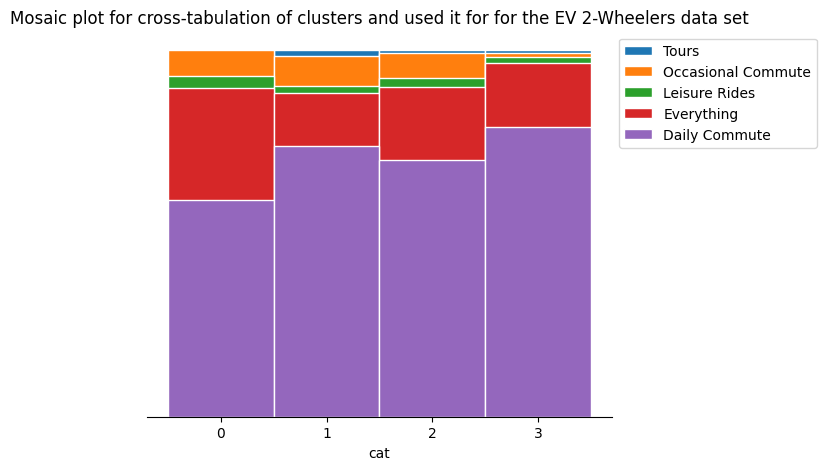

In [44]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

all segments predominantly use electric vehicles for daily commuting, with limited usage for tours, occasional commuting, and leisure rides.

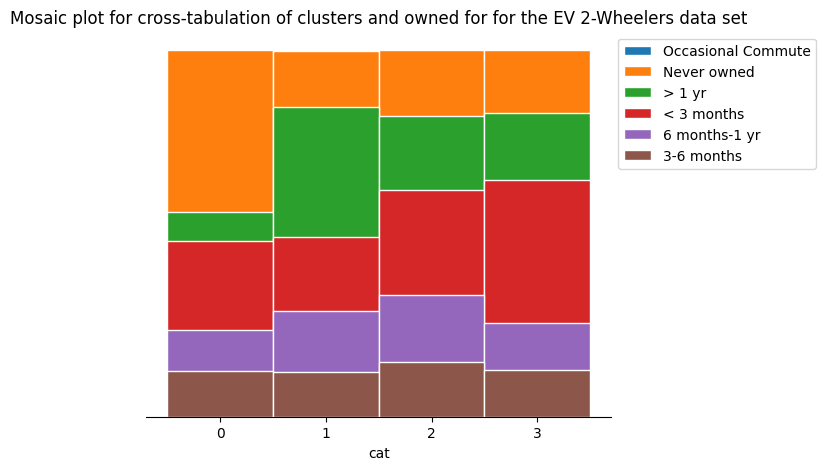

In [45]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

Segment 1 is notable for owning electric vehicles for more than a year, while Segment 0 lacks prior ownership experience.

In Segment 2, members have moderate ownership ranging from less than 3 months to over a year,

while Segment 3 consumers have owned electric vehicles for a few days to less than 3 months.

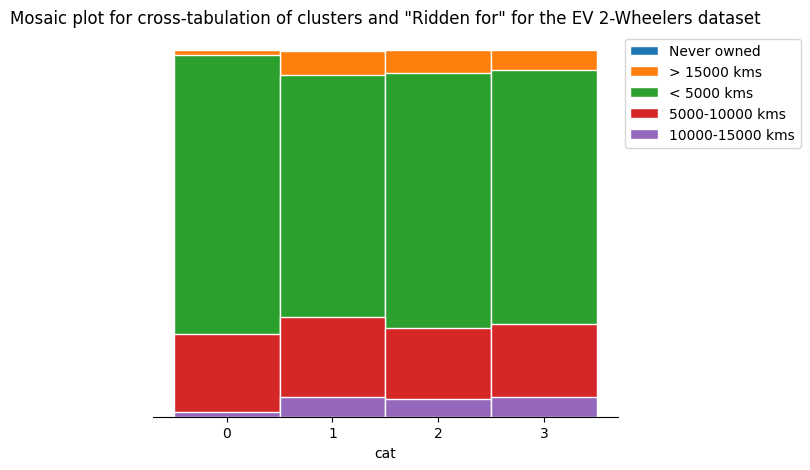

In [46]:
# Define your 'ridden_cluster' DataFrame
ridden_cluster = pd.crosstab(index=data_desc['cluster'], columns=data_desc['Ridden for'])

# Call your mosaicplot function with 'ridden_cluster' DataFrame
mosaicplot(ridden_cluster, color_list[:5], figsize=(6, 5), barwidth=1,
           title='Mosaic plot for cross-tabulation of clusters and "Ridden for" for the EV 2-Wheelers dataset')

All segments primarily use electric vehicles for commuting, with the majority of users covering distances below 5000 kilometers.

A small portion falls within the 5000 to 10000 kilometers range, which aligns with their commuting needs.

<ipython-input-47-8db23d948315>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)


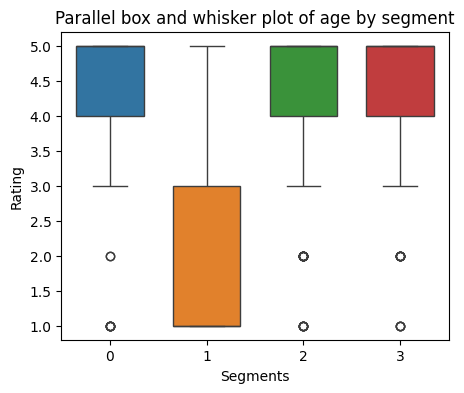

In [47]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()

Segment 1 consumers express dissatisfaction across all aspects, leading to lower overall ratings.

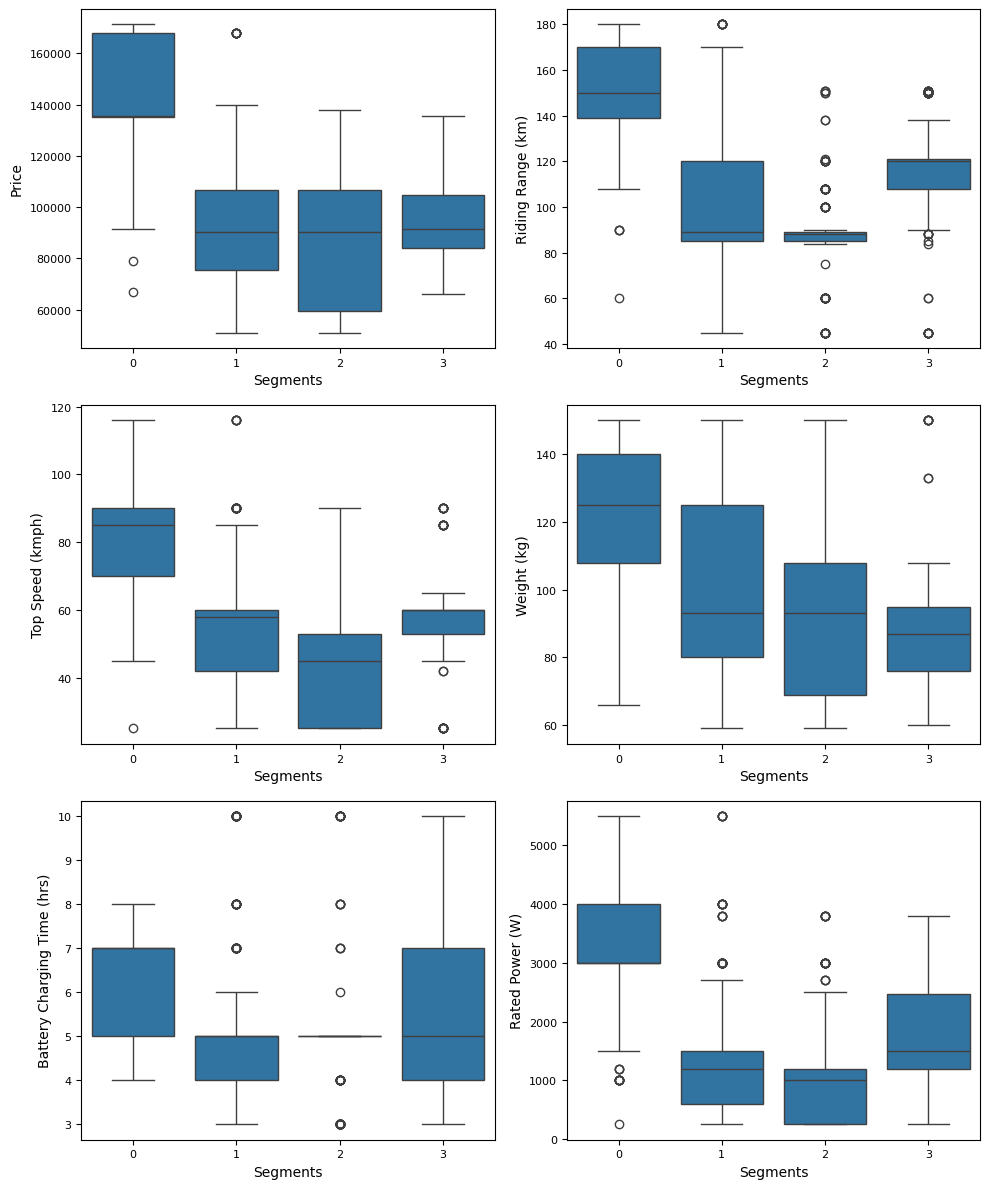

In [48]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

Segment 0: Premium electric vehicles are favored, characterized by higher price ranges and extended riding capabilities. This segment emphasizes luxury and long-distance travel, reflecting a preference for upscale options.

Segment 1: Budget-friendly electric vehicles are prioritized, featuring lower prices and moderate riding ranges. These options cater specifically to daily commuting needs, aligning with the preferences of this segment.

Segment 2: Affordability is key, with a focus on electric vehicles that offer competitive pricing and satisfactory riding ranges. While similar to Segment 3, there are slight variations in speed preferences within this segment.

Segment 3: Similar to Segment 2, affordability is paramount. However, there are nuanced differences in riding range and speed preferences. This segment also tends to favor lighter vehicle options.